# 신경망 학습

<br>

<br>

## 단순한 신경망 구현 : Logic Gate

<br>

### 필요한 모듈 import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

<ipython-input-1-66a077f50fee>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


<br>

### 하이퍼 파라미터(Hyper Parameter)

In [2]:
epochs = 1000
lr = 0.1

<br>

### 유틸 함수들(Util Functions)

- sigmoid

In [3]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

- softmax

In [8]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

<br>

- MSE

In [4]:
def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

- 크로스 엔트로피 오차

In [5]:
def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  
  return -np.sum(true_y * np.log(pred_y + delta))

- 배치에 대한 크로스 엔트로피 오차

In [6]:
def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

- 이진 크로스 엔트로피 오차

In [11]:
def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1- pred_y)))

<br>

- 미분

In [12]:
def differential(f, x):
  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val 

  return diff_value

<br>

### 신경망

In [21]:
class LogicGateNet():

  def __init__(self):
    def weight_init():
      np.random.seed(1)
      weights = np.random.rand(2)
      bias = np.random.rand(1)

      return weights, bias

    self.weights, self.bias = weight_init()

  def predict(self, x):
    W = self.weights.reshape(-1, 1)
    b = self.bias

    pred_y = sigmoid(np.dot(x, W) + b)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grad_W = differential(loss_grad, self.weights)
    grad_B = differential(loss_grad, self.bias)

    return grad_W, grad_B

<br>

### AND Gate

<br>

#### 모델 생성 및 학습

In [22]:
AND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0], [0], [0], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = AND.get_gradient(X, Y)

  AND.weights -= lr * grad_W
  AND.bias -= lr * grad_B

  loss = AND.loss(X, Y)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, AND.weights, AND.bias))

Epoch: 100, Cost: 0.6703649288690983, Weights: [1.14684857 1.24737423], Bias: [-2.15334596]
Epoch: 200, Cost: 0.4914051292871514, Weights: [1.8505543  1.88957211], Bias: [-3.08475984]
Epoch: 300, Cost: 0.3909923100415619, Weights: [2.35868338 2.37563883], Bias: [-3.79617159]
Epoch: 400, Cost: 0.32519023785958046, Weights: [2.76272218 2.77082306], Bias: [-4.37697186]
Epoch: 500, Cost: 0.2782816638476046, Weights: [3.10076671 3.10495315], Bias: [-4.86952426]
Epoch: 600, Cost: 0.24302165636509387, Weights: [3.3923874  3.39469668], Bias: [-5.29769087]
Epoch: 700, Cost: 0.2155190575847305, Weights: [3.64917707 3.65052241], Bias: [-5.67648867]
Epoch: 800, Cost: 0.19346573101426023, Weights: [3.87869145 3.87951227], Bias: [-6.01609872]
Epoch: 900, Cost: 0.17539444062318382, Weights: [4.08618981 4.08671076], Bias: [-6.32379433]
Epoch: 1000, Cost: 0.16032361587247546, Weights: [4.27550922 4.27585128], Bias: [-6.6049759]


<br>

#### 테스트

In [23]:
print(AND.predict(X))

[[0.00135179]
 [0.08873943]
 [0.08871177]
 [0.87505188]]


<br>

### OR Gate

<br>

#### 모델 생성 및 학습

In [25]:
OR = LogicGateNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_2 = np.array([[0], [1], [1], [1]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = OR.get_gradient(X, Y_2)

  OR.weights -= lr * grad_W 
  OR.bias -= lr * grad_B 

  loss = OR.loss(X, Y_2) 
  train_loss_list.append(loss)

  if i % 100 == 99:
     print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, OR.weights, OR.bias))

Epoch: 100, Cost: 0.4764558639826526, Weights: [1.85249172 1.99010432], Bias: [-0.2061687]
Epoch: 200, Cost: 0.3356853952440197, Weights: [2.64268089 2.71906988], Bias: [-0.69788722]
Epoch: 300, Cost: 0.2565418306934447, Weights: [3.23542859 3.28234692], Bias: [-1.04375393]
Epoch: 400, Cost: 0.20632746423317877, Weights: [3.70771305 3.73886408], Bias: [-1.30728079]
Epoch: 500, Cost: 0.17187425443601617, Weights: [4.09878075 4.12072851], Bias: [-1.51993261]
Epoch: 600, Cost: 0.1468948884521771, Weights: [4.43164667 4.44783457], Bias: [-1.69803104]
Epoch: 700, Cost: 0.12802287052929281, Weights: [4.72089799 4.73327496], Bias: [-1.85110183]
Epoch: 800, Cost: 0.11330144779290943, Weights: [4.97632756 4.98606751], Bias: [-1.98520582]
Epoch: 900, Cost: 0.10152020078877755, Weights: [5.20481001 5.2126572 ], Bias: [-2.10444513]
Epoch: 1000, Cost: 0.09189263089873165, Weights: [5.41134675 5.41779349], Bias: [-2.21172727]


<br>

#### 테스트

In [26]:
print(OR.predict(X))

[[0.09870231]
 [0.96106192]
 [0.96081995]
 [0.99981911]]


<br>

### NAND Gate

<br>

#### 모델 생성 및 학습

In [29]:
NAND = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_3 = np.array([[1], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = NAND.get_gradient(X, Y_3)

  NAND.weights -= lr * grad_W
  NAND.bias -= lr * grad_B

  loss = NAND.loss(X, Y_3)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, NAND.weights, NAND.bias))

Epoch: 100, Cost: 0.785575059252079, Weights: [-0.90420849 -0.80435571], Bias: [1.70129322]
Epoch: 200, Cost: 0.5459554011183771, Weights: [-1.65968544 -1.62270971], Bias: [2.76306714]
Epoch: 300, Cost: 0.42384640177649513, Weights: [-2.19944393 -2.18402146], Bias: [3.543421]
Epoch: 400, Cost: 0.34749295963020577, Weights: [-2.62669119 -2.61956974], Bias: [4.16749318]
Epoch: 500, Cost: 0.2945159073847124, Weights: [-2.98253561 -2.97895774], Bias: [4.69020982]
Epoch: 600, Cost: 0.25539588024130067, Weights: [-3.28813637 -3.28620862], Bias: [5.14081482]
Epoch: 700, Cost: 0.22526900089415539, Weights: [-3.55612786 -3.55502674], Bias: [5.53704322]
Epoch: 800, Cost: 0.2013447410774205, Weights: [-3.79478089 -3.79412024], Bias: [5.89061972]
Epoch: 900, Cost: 0.18189085629556617, Weights: [-4.00985544 -4.00944212], Bias: [6.20977098]
Epoch: 1000, Cost: 0.16576897477948987, Weights: [-4.20554543 -4.20527738], Bias: [6.50052361]


<br>

#### 테스트

In [30]:
print(NAND.predict(X))

[[0.9984996 ]
 [0.90848257]
 [0.90846028]
 [0.12894724]]


<br>

### XOR Gate

<br>

#### 모델 생성 및 학습

In [31]:
XOR = LogicGateNet()

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_4 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grad_W, grad_B = XOR.get_gradient(X, Y_4)

  XOR.weights -= lr * grad_W
  XOR.bias -= lr * grad_B

  loss = XOR.loss(X, Y_4)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}, Cost: {}, Weights: {}, Bias: {}".format(i+1, loss, XOR.weights, XOR.bias))

Epoch: 100, Cost: 1.3896650327220819, Weights: [0.1098786  0.19669642], Bias: [-0.18167981]
Epoch: 200, Cost: 1.3869638213490014, Weights: [0.05742285 0.08210642], Bias: [-0.08275424]
Epoch: 300, Cost: 1.3864305505528034, Weights: [0.02823182 0.03524852], Bias: [-0.03764863]
Epoch: 400, Cost: 1.3863223488274041, Weights: [0.01344098 0.01543553], Bias: [-0.01712583]
Epoch: 500, Cost: 1.3863001364313257, Weights: [0.00628411 0.00685107], Bias: [-0.00779009]
Epoch: 600, Cost: 1.3862955548113591, Weights: [0.00290682 0.00306799], Bias: [-0.00354348]
Epoch: 700, Cost: 1.3862946080009162, Weights: [0.00133598 0.00138179], Bias: [-0.00161183]
Epoch: 800, Cost: 1.3862944121930454, Weights: [0.0006116  0.00062463], Bias: [-0.00073317]
Epoch: 900, Cost: 1.386294371686617, Weights: [0.00027931 0.00028301], Bias: [-0.0003335]
Epoch: 1000, Cost: 1.3862943633061662, Weights: [0.00012737 0.00012842], Bias: [-0.0001517]


<br>

#### 테스트
- **XOR 문제 발생 $\rightarrow$ 다층 신경망 필요**

In [32]:
print(XOR.predict(X))

[[0.49996208]
 [0.49999418]
 [0.49999392]
 [0.50002602]]


<br>

#### 2층 신경망으로 XOR 게이트 구현(1)

- 얕은 신경망, Shallow Neural Network

- **두 논리게이트(NAND, OR)를 통과하고  
  AND 게이트로 합쳐서 구현**

- 06 신경망 구조 참고

In [37]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

s1 = NAND.predict(X)
s2 = OR.predict(X)

X_2 = np.array([s1, s2]).T.reshape(-1, 2)

<br>

#### 테스트

In [39]:
print(AND.predict(X_2))

[[0.12854947]
 [0.80036985]
 [0.80018926]
 [0.1444782 ]]


<br>

#### 2층 신경망으로 XOR 게이트 구현(2)
- 클래스로 구현

In [44]:
class XORNet():
  
  def __init__(self):
    np.random.seed(1)

    def weight_init():
      params = {}
      params['W_1'] = np.random.randn(2)
      params['b_1'] = np.random.rand(2)
      params['W_2'] = np.random.randn(2)
      params['b_2'] = np.random.rand(2)

      return params

    self.params = weight_init() 

  def predict(self, x):
    W_1, W_2 = self.params['W_1'].reshape(-1, 1), self.params['W_2'].reshape(-1, 1)
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = sigmoid(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return cross_entropy_error_for_bin(pred_y, true_y)

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    grads['W_1'] = differential(loss_grad, self.params['W_1'])
    grads['b_1'] = differential(loss_grad, self.params['b_1'])
    grads['W_2'] = differential(loss_grad, self.params['W_2'])
    grads['b_2'] = differential(loss_grad, self.params['b_2'])

    return grads

<br>

#### 하이퍼 파라미터(Hyper Parameter)
- 재조정

In [45]:
lr = 0.3

<br>

#### 모델 생성 및 학습

In [51]:
XOR = XORNet()
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y_5 = np.array([[0], [1], [1], [0]])

train_loss_list = list()

for i in range(epochs):
  grads = XOR.get_gradient(X, Y_5)

  for key in ('W_1', 'b_1', 'W_2', 'b_2'):
    XOR.params[key] -= lr * grads[key]

  loss = XOR.loss(X, Y_5)
  train_loss_list.append(loss)

  if i % 100 == 99:
    print("Epoch: {}. Cost: {}".format(i+1, loss))

Epoch: 100. Cost: 2.5834212497201356
Epoch: 200. Cost: 0.6522444537954067
Epoch: 300. Cost: 0.2505164706375528
Epoch: 400. Cost: 0.14964904919736932
Epoch: 500. Cost: 0.10570445867626088
Epoch: 600. Cost: 0.08140304398213546
Epoch: 700. Cost: 0.06606149913172887
Epoch: 800. Cost: 0.05552519160798142
Epoch: 900. Cost: 0.04785478827854932
Epoch: 1000. Cost: 0.04202712241928985


<br>

#### 테스트

In [52]:
print(XOR.predict(X))

[[0.00846377 0.00846377]
 [0.98354369 0.98354369]
 [0.99163498 0.99163498]
 [0.0084976  0.0084976 ]]


<br>

<br>

## 다중 클래스 분류 : MNIST Dataset

<br>

### 배치 처리
- **학습 데이터 전체를 한번에 진행하지 않고, 일부 데이터(샘플)을 확률적으로 구해서 조금씩 나누어 진행**
  - **확률적 경사 하강법(Stochastic Gradient Descent) 또는  
  미니 배치 학습법(mini-batch learning)이라고도 부름**

<br>

#### 신경망 구현 : MNIST 

<br>

#### 필요한 모듈 임포트

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import time
from tqdm.notebook import tqdm

<br>

#### 데이터 로드

In [55]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


<br>

#### 데이터 확인

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


(28, 28)


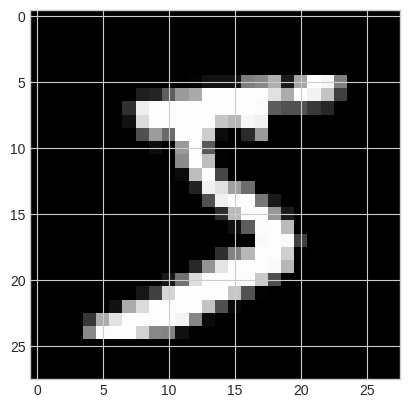

In [57]:
img = x_train[0]
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

In [58]:
y_train[0]

5

<br>

#### 데이터 전처리 (Data Preprocessing)

- **데이터 평면화**

In [59]:
def flatten_for_mnist(x):
  temp = np.zeros((x.shape[0], x[0].size))

  for idx, data in enumerate(x):
    temp[idx, :] = data.flatten()

  return temp

- **색상 (RGB)에 대한 정규화**

In [60]:
x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = flatten_for_mnist(x_train)
x_test = flatten_for_mnist(x_test)

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


- **10개의 범주에 대한 원-핫 인코딩**

In [62]:
y_train_ohe = tf.one_hot(y_train, depth=10).numpy()
y_test_ohe = tf.one_hot(y_test, depth=10).numpy()

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(60000, 10)
(10000, 10)


In [63]:
print(x_train[0].max(), x_train[0].min())
print(y_train_ohe[0])

1.0 0.0
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<br>

#### 하이퍼 파라미터(Hyper Parameter)

In [66]:
epochs = 2
lr = 0.1
batch_size = 100
train_size = x_train.shape[0]

<br>

#### 사용되는 함수들(Util Functions)

- sigmoid

In [ ]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

- softmax

In [ ]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

<br>

- MSE

In [ ]:
def mean_squared_error(pred_y, true_y):
  return 0.5 * (np.sum((true_y - pred_y)**2))

- 크로스 엔트로피 오차

In [ ]:
def cross_entropy_error(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  
  return -np.sum(true_y * np.log(pred_y + delta))

- 배치에 대한 크로스 엔트로피 오차

In [ ]:
def cross_entropy_error_for_batch(pred_y, true_y):
  if true_y.ndim == 1:
    true_y = true_y.reshape(1, -1)
    pred_y = pred_y.reshape(1, -1)

  delta = 1e-7
  batch_size = pred_y.shape[0]
  
  return -np.sum(true_y * np.log(pred_y + delta)) / batch_size

- 이진 크로스 엔트로피 오차

In [ ]:
def cross_entropy_error_for_bin(pred_y, true_y):
  return 0.5 * np.sum((-true_y * np.log(pred_y) - (1 - true_y) * np.log(1- pred_y)))

<br>

- 미분

In [68]:
def differential_1d(f, x):

  eps = 1e-5
  diff_value = np.zeros_like(x)

  for i in range(x.shape[0]):
    temp_val = x[i]

    x[i] = temp_val + eps
    f_h1 = f(x)

    x[i] = temp_val - eps
    f_h2 = f(x)

    diff_value[i] = (f_h1 - f_h2) / (2 * eps)
    x[i] = temp_val 

  return diff_value

In [69]:
def differential_2d(f, X):

  if X.ndim == 1:
    return differential_1d(f, X)
  else:
    grad = np.zeros_like(X)

    for idx, x in enumerate(X):
      grad[idx] = differential_1d(f, x)
    return grad

<br>

#### 2층 신경망으로 구현

In [70]:
class MyModel():
  
  def __init__(self):

    def weight_init(input_nodes, hidden_nodes, output_units):
      np.random.seed(777)

      params = {}
      params['W_1'] = 0.01 * np.random.randn(input_nodes, hidden_nodes)
      params['b_1'] = np.zeros(hidden_nodes)
      params['W_2'] = 0.01 * np.random.randn(hidden_nodes, output_units)
      params['b_2'] = np.zeros(output_units)

      return params

    self.params = weight_init(784, 64, 10) 

  def predict(self, x):
    W_1, W_2 = self.params['W_1'], self.params['W_2']
    B_1, B_2 = self.params['b_1'], self.params['b_2']

    A1 = np.dot(x, W_1) + B_1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W_2) + B_2
    pred_y = softmax(A2)

    return pred_y

  def loss(self, x, true_y):
    pred_y = self.predict(x)

    return cross_entropy_error_for_batch(pred_y, true_y)

  def accuracy(self, x, true_y):
    pred_y = self.predict(x)
    y_argmax = np.argmax(pred_y, axis=1)
    t_argmax = np.argmax(true_y, axis=1)

    accuracy = np.sum(y_argmax == t_argmax) / (float(x.shape[0]))

  def get_gradient(self, x, t):
    def loss_grad(grad):
      return self.loss(x, t)

    grads = {}
    grads['W_1'] = differential_2d(loss_grad, self.params['W_1'])
    grads['b_1'] = differential_2d(loss_grad, self.params['b_1'])
    grads['W_2'] = differential_2d(loss_grad, self.params['W_2'])
    grads['b_2'] = differential_2d(loss_grad, self.params['b_2'])

    return grads

<br>

#### 모델 생성 및 학습
- 시간 많이 소요

In [72]:
model = MyModel()

train_loss_list = list()
train_acc_list = list()
test_acc_list = list()
iter_per_epoch = max(train_size / batch_size, 1)

start_time = time.time()
for i in tqdm(range(epochs)):

  batch_idx = np.random.choice(train_size, batch_size)
  x_batch = x_train[batch_idx]
  y_batch = y_train_ohe[batch_idx]

  grads = model.get_gradient(x_batch, y_batch)

  for key in grads.keys():
    model.params[key] -= lr * grads[key]

  loss = model.loss(x_batch, y_batch)
  train_loss_list.append(loss)

  train_accuracy = model.accuracy(x_train, y_train_ohe)
  test_accuracy = model.accuracy(x_test, y_test_ohe)

  train_acc_list.append(train_accuracy)
  test_acc_list.append(test_accuracy)

  print("Epoch: {}, Cost: {}, Train Accuracy: {}, Test Accuracy: {}".format(i+1, loss, train_accuracy, test_accuracy))

end_time = time.time()

print("총 학습 소요시간: {:.3f}s".format(end_time - start_time))

  0%|          | 0/2 [00:00<?, ?it/s]

Epoch: 1, Cost: 6.8868753378080365, Train Accuracy: None, Test Accuracy: None
Epoch: 2, Cost: 6.893394499787325, Train Accuracy: None, Test Accuracy: None
총 학습 소요시간: 131.684s


<br>

### 모델의 결과
- 모델은 학습이 잘 될 수도, 잘 안될 수도 있음

- 만약, 학습이 잘 되지 않았다면,  
  학습이 잘 되기 위해서 어떠한 조치를 취해야 하는가?
  - 다양한 학습관련 기술이 존재